In [6]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [7]:
X = np.array([
    [1, 1],
    [2, 1],
    [3, 2],
    [4, 3],
    [5, 3]
])

In [26]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [28]:
y_pred = model.predict(X)

In [30]:
residuals = y-y_pred

In [8]:
y = np.array([20, 40, 50, 65, 80])
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
mae = mean_absolute_error(y, y_pred)

In [9]:
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

In [10]:
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 1.20
Mean Squared Error (MSE): 1.50
Root Mean Squared Error (RMSE): 1.22
R² Score: 1.00


Coeficcients (b1=Hours, b2=Practice_Tests): [17.5 -5. ]
Intercept (b0): 8.50
Mean Absolute Error (MAE): 1.20
Mean Squared Error (MSE): 1.50
Root Mean Squared Error (RMSE): 1.22
R² Score: 1.00


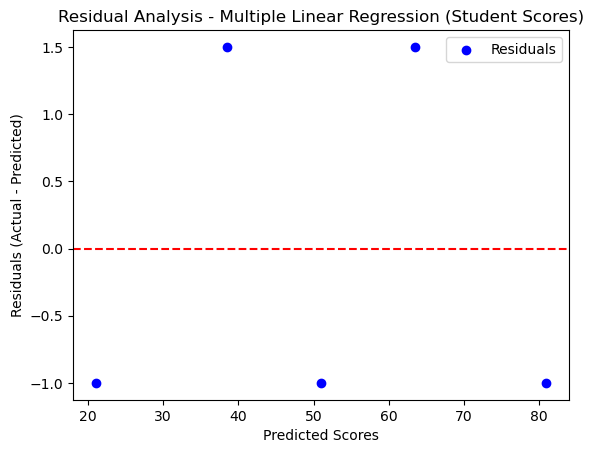

In [32]:
print("Coeficcients (b1=Hours, b2=Practice_Tests):", model.coef_)
b0 = model.intercept_
print(f"Intercept (b0): {b0:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

plt.scatter(y_pred, residuals, color='blue', label="Residuals")
plt.axhline(y=0, color='red', linestyle="--")
plt.xlabel("Predicted Scores")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Analysis - Multiple Linear Regression (Student Scores)")
plt.legend()
plt.show()